In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns

In [25]:
df = pd.read_csv('dados_filtrados.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,TP_ESCOLA,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,1,1,1,1,24,1,4,NaN,0,436.3,495.4,581.2,399.4,1.0,520.0
1,2,1,1,1,17,2,0,1.0,0,474.5,544.1,599.0,459.8,1.0,580.0
2,1,0,0,0,21,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,0,0,25,1,9,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,0,0,28,1,4,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18301,2,1,1,1,17,2,0,1.0,0,398.3,558.2,511.6,NaN,1.0,500.0
18302,2,1,1,1,17,2,0,1.0,0,427.6,579.7,471.1,NaN,1.0,520.0
18303,1,1,1,1,19,1,2,NaN,0,639.2,643.8,604.9,NaN,1.0,640.0
18304,1,1,1,1,17,3,0,NaN,1,427.1,467.9,540.2,NaN,1.0,520.0


In [26]:
print(df.isna().sum())

TP_ESCOLA                0
TP_PRESENCA_CH           0
TP_PRESENCA_CN           0
TP_PRESENCA_LC           0
NU_IDADE                 0
TP_ST_CONCLUSAO          0
TP_ANO_CONCLUIU          0
TP_ENSINO            12544
IN_TREINEIRO             0
NU_NOTA_CN            4523
NU_NOTA_CH            4523
NU_NOTA_LC            4796
NU_NOTA_MT            8173
TP_STATUS_REDACAO     4796
NU_NOTA_REDACAO       4796
dtype: int64


In [27]:
# faltou 36 pras CN e CH
mat = df[df[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH']].notna().all(axis=1)]
mat

,TP_ESCOLA,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,1,1,1,1,24,1,4,NaN,0,436.3,495.4,581.2,399.4,1.0,520.0
1,2,1,1,1,17,2,0,1.0,0,474.5,544.1,599.0,459.8,1.0,580.0
5,1,1,1,1,18,1,1,NaN,0,439.7,583.2,410.9,364.5,1.0,620.0
6,2,1,1,1,18,2,0,1.0,0,420.1,604.2,484.5,529.2,1.0,560.0
7,1,1,1,1,18,1,1,NaN,0,619.6,625.8,611.2,566.7,1.0,620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,1,1,1,1,20,1,3,NaN,0,438.2,419.7,394.5,403.2,1.0,440.0
13726,1,1,1,1,33,1,10,NaN,0,423.8,557.9,533.0,452.4,1.0,560.0
13727,1,1,1,1,15,3,0,NaN,1,460.5,528.9,569.3,398.0,1.0,600.0
13728,1,1,1,1,36,4,0,NaN,0,422.5,621.7,569.0,386.6,1.0,460.0


In [28]:
print(mat.isna().sum())
print(len(mat))

TP_ESCOLA               0
TP_PRESENCA_CH          0
TP_PRESENCA_CN          0
TP_PRESENCA_LC          0
NU_IDADE                0
TP_ST_CONCLUSAO         0
TP_ANO_CONCLUIU         0
TP_ENSINO            6469
IN_TREINEIRO            0
NU_NOTA_CN              0
NU_NOTA_CH              0
NU_NOTA_LC              0
NU_NOTA_MT              0
TP_STATUS_REDACAO       0
NU_NOTA_REDACAO         0
dtype: int64
10097


<AxesSubplot:>

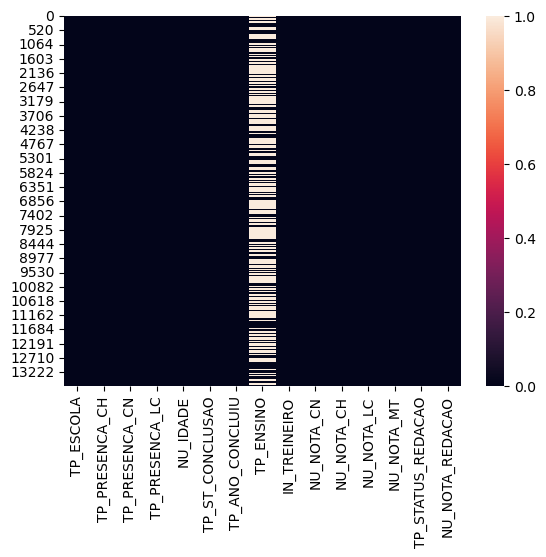

In [29]:
sns.heatmap(mat.isnull())

In [30]:
#pairplot = sns.pairplot(mat)
#pairplot.savefig('pairplot.jpg', dpi=300)

In [31]:
mat = mat.drop(columns=['TP_PRESENCA_LC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH'])
mat

,TP_ESCOLA,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,1,24,1,4,NaN,0,436.3,495.4,581.2,399.4,1.0,520.0
1,2,17,2,0,1.0,0,474.5,544.1,599.0,459.8,1.0,580.0
5,1,18,1,1,NaN,0,439.7,583.2,410.9,364.5,1.0,620.0
6,2,18,2,0,1.0,0,420.1,604.2,484.5,529.2,1.0,560.0
7,1,18,1,1,NaN,0,619.6,625.8,611.2,566.7,1.0,620.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13725,1,20,1,3,NaN,0,438.2,419.7,394.5,403.2,1.0,440.0
13726,1,33,1,10,NaN,0,423.8,557.9,533.0,452.4,1.0,560.0
13727,1,15,3,0,NaN,1,460.5,528.9,569.3,398.0,1.0,600.0
13728,1,36,4,0,NaN,0,422.5,621.7,569.0,386.6,1.0,460.0


In [32]:
mat = mat.fillna(0)

notas = mat[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

mat

,TP_ESCOLA,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,1,24,1,4,0.0,0,436.3,495.4,581.2,399.4,1.0,520.0
1,2,17,2,0,1.0,0,474.5,544.1,599.0,459.8,1.0,580.0
5,1,18,1,1,0.0,0,439.7,583.2,410.9,364.5,1.0,620.0
6,2,18,2,0,1.0,0,420.1,604.2,484.5,529.2,1.0,560.0
7,1,18,1,1,0.0,0,619.6,625.8,611.2,566.7,1.0,620.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13725,1,20,1,3,0.0,0,438.2,419.7,394.5,403.2,1.0,440.0
13726,1,33,1,10,0.0,0,423.8,557.9,533.0,452.4,1.0,560.0
13727,1,15,3,0,0.0,1,460.5,528.9,569.3,398.0,1.0,600.0
13728,1,36,4,0,0.0,0,422.5,621.7,569.0,386.6,1.0,460.0


<AxesSubplot:>

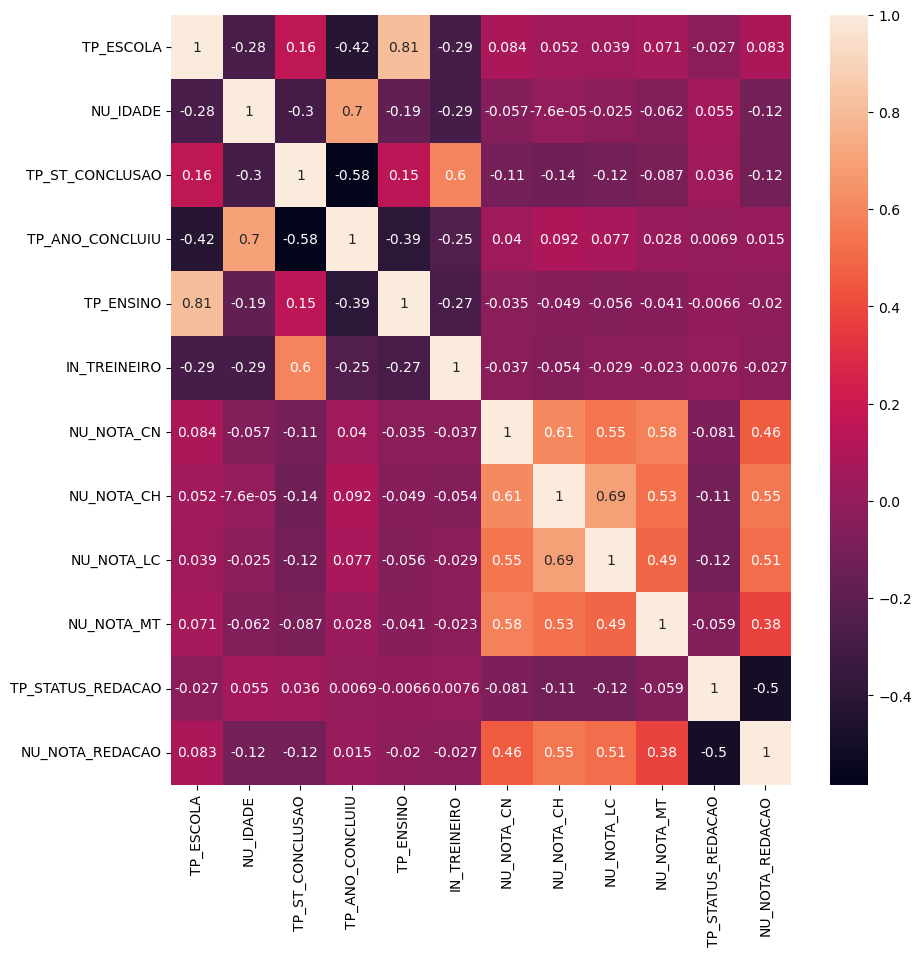

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(mat.corr(), annot=True)

In [34]:
mat = mat.drop(columns=['TP_STATUS_REDACAO'])
mat

,TP_ESCOLA,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1,24,1,4,0.0,0,436.3,495.4,581.2,399.4,520.0
1,2,17,2,0,1.0,0,474.5,544.1,599.0,459.8,580.0
5,1,18,1,1,0.0,0,439.7,583.2,410.9,364.5,620.0
6,2,18,2,0,1.0,0,420.1,604.2,484.5,529.2,560.0
7,1,18,1,1,0.0,0,619.6,625.8,611.2,566.7,620.0
...,...,...,...,...,...,...,...,...,...,...,...
13725,1,20,1,3,0.0,0,438.2,419.7,394.5,403.2,440.0
13726,1,33,1,10,0.0,0,423.8,557.9,533.0,452.4,560.0
13727,1,15,3,0,0.0,1,460.5,528.9,569.3,398.0,600.0
13728,1,36,4,0,0.0,0,422.5,621.7,569.0,386.6,460.0


In [35]:
trei = mat[mat['IN_TREINEIRO'] == 1]

#trei['TP_ANO_CONCLUIU'].unique()
print(trei['TP_ST_CONCLUSAO'].unique())
print(trei['TP_ANO_CONCLUIU'].unique())


# TREINEIRO E REDUNDANTE

mat = mat.drop(columns=['IN_TREINEIRO'])
mat.head()

[3]
[0]


,TP_ESCOLA,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1,24,1,4,0.0,436.3,495.4,581.2,399.4,520.0
1,2,17,2,0,1.0,474.5,544.1,599.0,459.8,580.0
5,1,18,1,1,0.0,439.7,583.2,410.9,364.5,620.0
6,2,18,2,0,1.0,420.1,604.2,484.5,529.2,560.0
7,1,18,1,1,0.0,619.6,625.8,611.2,566.7,620.0


<AxesSubplot:>

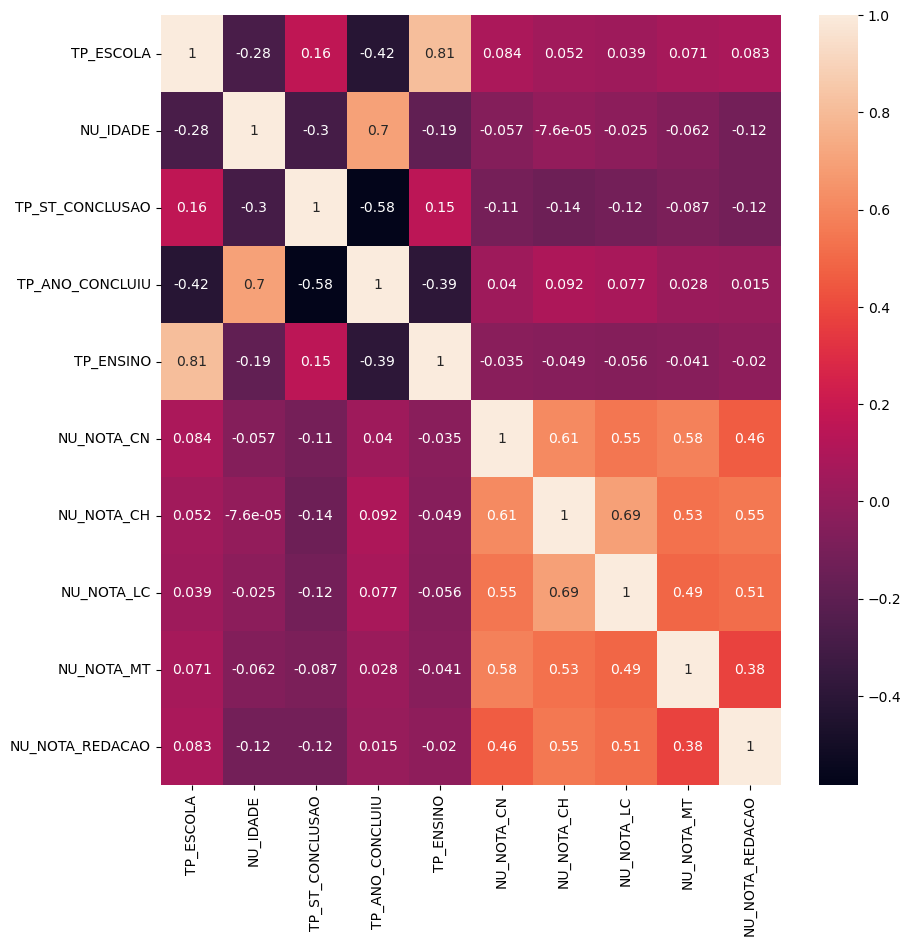

In [36]:
plt.figure(figsize=(10, 10))
sns.heatmap(mat.corr(), annot=True)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge

In [38]:
def reg(dfs, tipo):

    X = dfs.drop(['NU_NOTA_MT'], axis=1) # features
    y = dfs.NU_NOTA_MT # target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=18)

    regr = linear_model.LinearRegression() # Create regressor
    regr.fit(X_train, y_train) # Train regressor

    regr = Lasso(alpha=5.0)
    regr.fit(X_train, y_train)

    coef = regr.coef_

    # PREDICAO DO TREINO
    y_pred = regr.predict(X_train)
    display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred)
    display.plot()
    plt.title('Resíduos do conjunto treino')
    plt.xlabel('Valores preditos')
    plt.ylabel('Resíduos')
    plt.savefig('train_'+tipo, dpi=300)
    plt.show()

    print('R^2 = ', r2_score(y_train, y_pred))
    print('MSE = ', mean_squared_error(y_train, y_pred))
    print('MAE = ', mean_absolute_error(y_train, y_pred))

    # PRECISAO TESTE

    y_pred_test = regr.predict(X_test)
    display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_test)
    display.plot()
    plt.title('Resíduos do conjunto teste')
    plt.xlabel('Valores preditos')
    plt.ylabel('Resíduos')
    plt.savefig('test_'+tipo, dpi=300)
    plt.show()

    print('R^2 = ', r2_score(y_test, y_pred_test))
    print('MSE = ', mean_squared_error(y_test, y_pred_test))
    print('MAE = ', mean_absolute_error(y_test, y_pred_test))

    # Gráfico dos coeficientes ajustados
    fig = sns.barplot (x=X_train.columns, y=coef)

    plt.xticks(rotation=30)
    plt.xlabel("Preditores")
    plt.ylabel("Coeficientes ajustados")
    plt.savefig('Par-' + tipo)

    X_trainsm = sm.add_constant(X_train) # adicionar uma coluna constante para o statsmodels ajustar um itercepto
    mod = sm.OLS(y_train, X_trainsm) # ajustar o modelo
    regsm = mod.fit()
    print(regsm.summary())


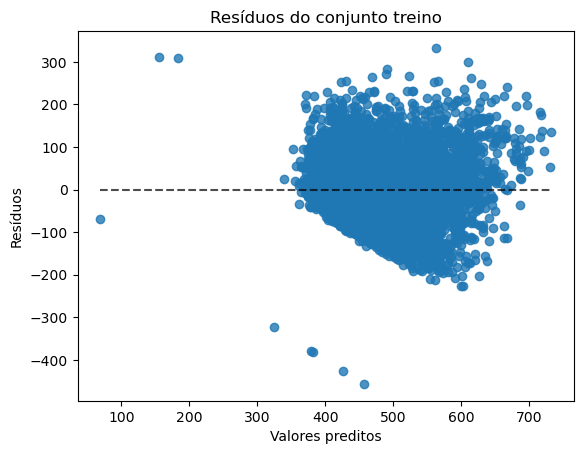

R^2 =  0.3952167425916918
MSE =  5917.013952538398
MAE =  60.71830132518619


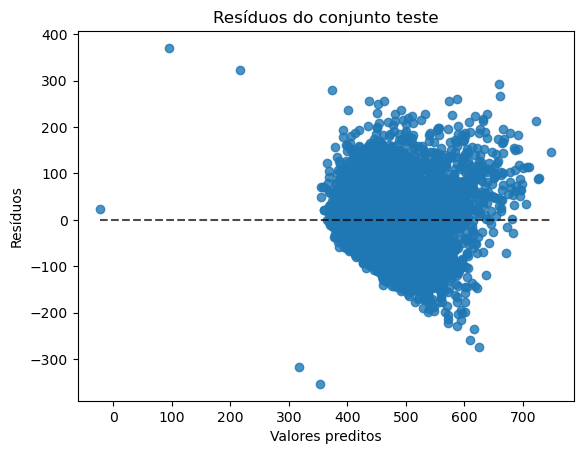

R^2 =  0.4115266679500711
MSE =  5978.111408352098
MAE =  61.56928332865637
                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     442.4
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        15:58:50   Log-Likelihood:                -34896.
No. Observations:                6058   AIC:                         6.981e+04
Df Residuals:                    6048   BIC:                         6.988e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

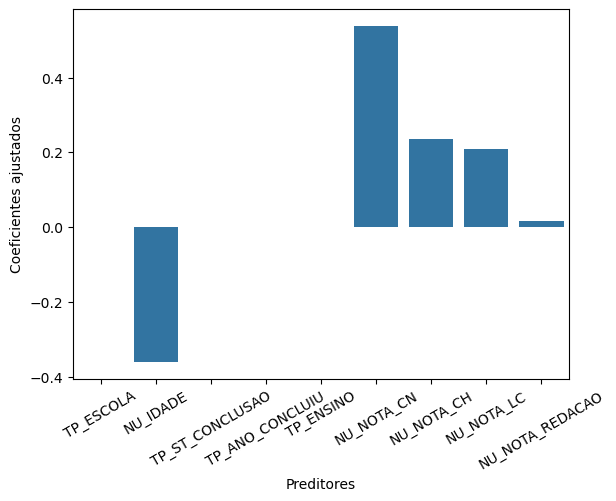

In [39]:
reg(mat, 'todos')

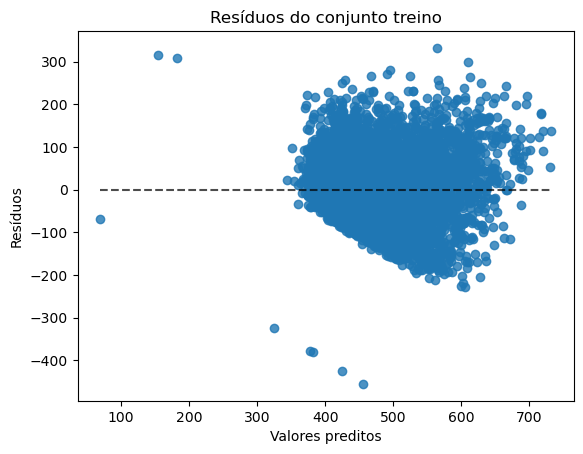

R^2 =  0.39432959303967974
MSE =  5925.693551738513
MAE =  60.733213155697925


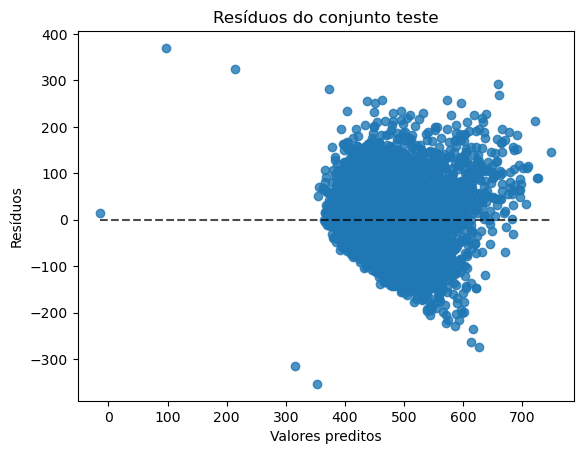

R^2 =  0.41032204196137034
MSE =  5990.348816529566
MAE =  61.645494236436
                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     985.2
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        15:58:52   Log-Likelihood:                -34909.
No. Observations:                6058   AIC:                         6.983e+04
Df Residuals:                    6053   BIC:                         6.986e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

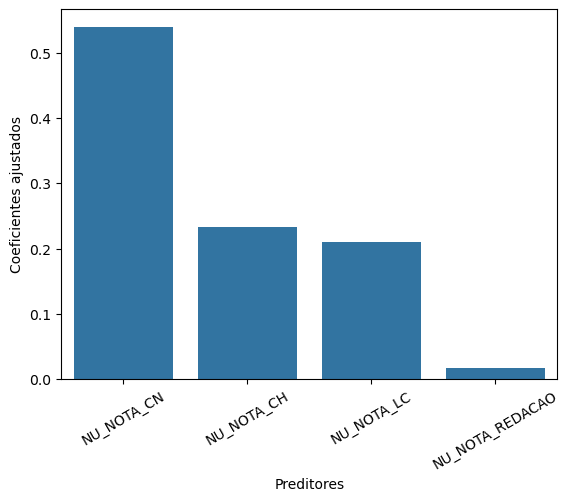

In [40]:
reg(notas, 'notas')

In [56]:
def rf(dfs, tipo):

    X = dfs.drop(['NU_NOTA_MT'], axis=1) # features
    y = dfs.NU_NOTA_MT # target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=18)

    clf_rf = RandomForestRegressor(n_estimators=550, max_depth=5)

    clf_rf.fit(X_train, y_train)

    y_pred = clf_rf.predict(X_train)

    display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred)
    display.plot()
    plt.savefig('rf_train_'+tipo, dpi=300)
    plt.show()

    # Métricas de desempenho - conjunto de teste

    y_pred_test = clf_rf.predict(X_test)
    display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_test)
    display.plot()
    plt.savefig('rf_test_'+tipo, dpi=300)
    plt.show()

    print('R^2 = ', r2_score(y_train, y_pred))
    print('MSE = ', mean_squared_error(y_train, y_pred))
    print('MAE = ', mean_absolute_error(y_train, y_pred))
    print()
    print('R^2 = ', r2_score(y_test, y_pred_test))
    print('MSE = ', mean_squared_error(y_test, y_pred_test))
    print('MAE = ', mean_absolute_error(y_test, y_pred_test))

    # # Gráfico dos coeficientes ajustados
    # fig = sns.barplot (x=np.arange(1, len(coef)+1), y=coef)
    # plt.xlabel("Preditores")
    # plt.ylabel("Coeficientes ajustados")
    # plt.savefig('rf_par_'+tipo, dpi=300)

    X_trainsm = sm.add_constant(X_train) # adicionar uma coluna constante para o statsmodels ajustar um itercepto
    mod = sm.OLS(y_train, X_trainsm) # ajustar o modelo
    regsm = mod.fit()
    print(regsm.summary())

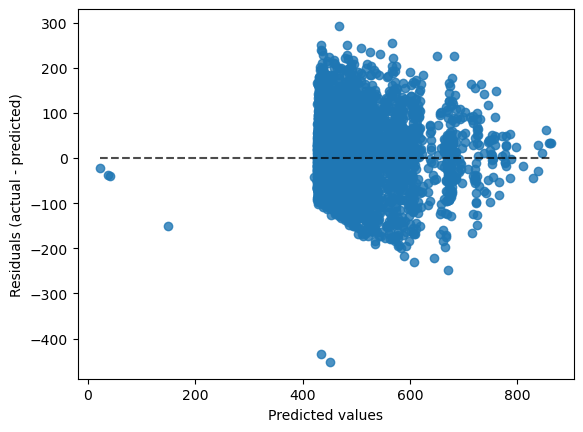

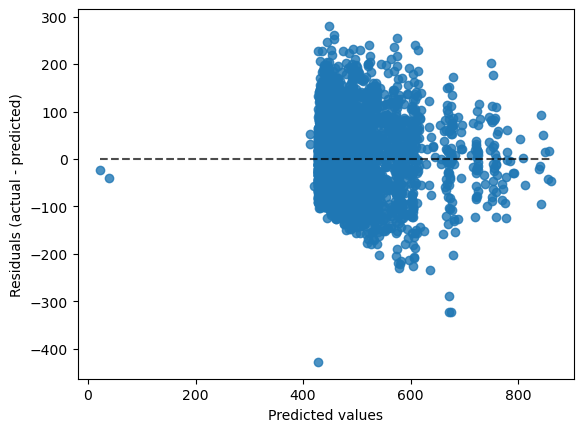

R^2 =  0.4742023495927765
MSE =  5144.242992115457
MAE =  56.935756495618804

R^2 =  0.45335686510996787
MSE =  5553.171882232706
MAE =  59.13369424344178
                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     985.2
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        16:22:14   Log-Likelihood:                -34909.
No. Observations:                6058   AIC:                         6.983e+04
Df Residuals:                    6053   BIC:                         6.986e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P

In [57]:
rf(notas, 'nota')

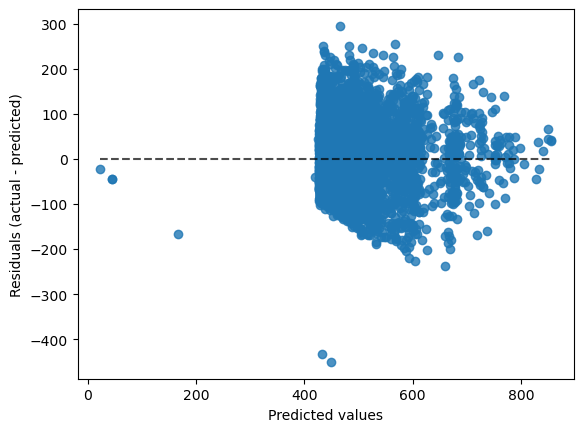

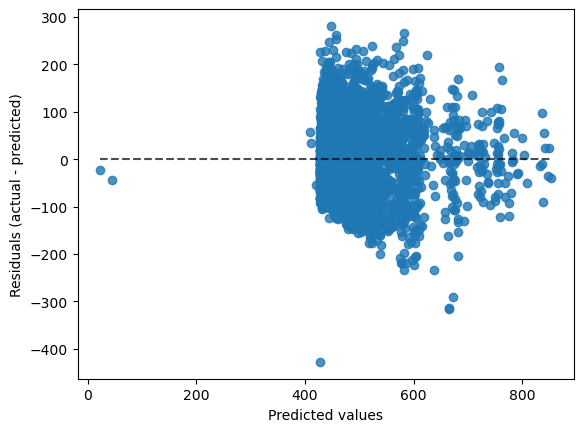

R^2 =  0.47660903736363724
MSE =  5120.696696901183
MAE =  56.82396340211897

R^2 =  0.45369425500203986
MSE =  5549.74444677725
MAE =  59.13861615878975
                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     442.4
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        16:22:45   Log-Likelihood:                -34896.
No. Observations:                6058   AIC:                         6.981e+04
Df Residuals:                    6048   BIC:                         6.988e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>

In [58]:
rf(mat, 'todos')

In [45]:
dfs = notas

X = dfs.drop(['NU_NOTA_MT'], axis=1) # features
y = dfs.NU_NOTA_MT # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=18)

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

clf_rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [550],
    'max_depth': [5],
}

# Realizar a busca em grade com validação cruzada
grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Melhor estimador
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ......................max_depth=5, n_estimators=550; total time=   3.5s
[CV] END ......................max_depth=5, n_estimators=550; total time=   3.5s
[CV] END ......................max_depth=5, n_estimators=550; total time=   3.5s


In [55]:
def rf(X_train, X_test, y_train, y_test, tipo):

    # Treinar o modelo com os melhores hiperparâmetros
    best_rf.fit(X_train, y_train)

    # Fazer previsões no conjunto de treino e teste
    y_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)

    # Calcular o MSE para o conjunto de treino e teste
    mse_train = mean_squared_error(y_train, y_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print('MSE no conjunto de treino:', mse_train)
    print('MSE no conjunto de teste:', mse_test)

    display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred)
    display.plot()
    plt.savefig('rf_train_'+tipo, dpi=300)
    plt.show()

    # Métricas de desempenho - conjunto de teste

    y_pred_test = clf_rf.predict(X_test)
    display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_test)
    display.plot()
    plt.savefig('rf_test_'+tipo, dpi=300)
    plt.show()

    print('R^2 = ', r2_score(y_train, y_pred))
    print('MSE = ', mean_squared_error(y_train, y_pred))
    print('MAE = ', mean_absolute_error(y_train, y_pred))
    print()
    print('R^2 = ', r2_score(y_test, y_pred_test))
    print('MSE = ', mean_squared_error(y_test, y_pred_test))
    print('MAE = ', mean_absolute_error(y_test, y_pred_test))